# This is a demo of how load to MNIST raw pngs manually without torchvision and use CrysX for neural network machine learning

## Run the following for Google colab 
then restart runtime

In [ ]:
! pip install --upgrade --no-cache-dir https://github.com/manassharma07/crysx_nn/tarball/main
! pip install IPython==7.7.0

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
from crysx_nn import mnist_utils as mu
import numpy as np

## Download MNIST_orig and MNIST_orig dataset  (May take upto 5 min)

In [2]:
%%time
mu.downloadMNIST()

Wall time: 2min 39s


## Load the training dataset from MNIST_orig in memory (May take upto 5 min)

In [4]:
%%time
path = 'MNIST-PLUS-PNG/mnist_orig_png'
trainData, trainLabels = mu.loadMNIST(path_main=path, train=True, shuffle=True)

Wall time: 3min 20s


In [5]:
print('Training data shape', trainData.shape)
print('Training labels shape',trainLabels.shape)
print('Size of training data in memory (GB)', trainData.nbytes/1024/1024/1024)

Training data shape (60000, 28, 28)
Training labels shape (60000, 1)
Size of training data in memory (GB) 0.3504753112792969


In [6]:
# Statistics
print(trainData.min()) # Expected for MNIST_orig: 0.0
print(trainData.max()) # Expected for MNIST_orig: 255.
print(trainData.mean()) # Expected for MNIST_orig: 33.31842144
print(trainData.std()) # Expected for MNIST_orig: 78.567489983

0.0
255.0
33.318421449829934
78.56748998339796


## Normalize within the range [0,1.0]

In [7]:
trainData = trainData/255 # Normalize
# Statistics
print(trainData.min()) # Expected for MNIST_orig: 0.0
print(trainData.max()) # Expected for MNIST_orig: 1.0
print(trainData.mean()) # Expected for MNIST_orig: 0.1306604762738426
print(trainData.std()) # Expected for MNIST_orig: 0.3081078038564622 

0.0
1.0
0.13066047627384328
0.3081078038564626


## Standardize the data so that it has mean 0 and variance 1

In [8]:
trainData = (trainData - np.mean(trainData)) / np.std(trainData)
# Statistics
print(trainData.min()) # Expected for MNIST_orig: -0.42407
print(trainData.max()) # Expected for MNIST_orig: 2.8215433
print(trainData.mean()) # Expected for MNIST_orig: 0.0
print(trainData.std()) # Expected for MNIST_orig: 1.0000

-0.4240738943915674
2.8215433456893346
-1.2434833208470416e-15
1.0000000000000002


## Convert labels to one-hot vectors

In [9]:
print(trainLabels)
trainLabels = mu.one_hot_encode(trainLabels, 10)
print(trainLabels)

[[8.]
 [5.]
 [2.]
 ...
 [6.]
 [7.]
 [5.]]
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Flatten the input numpy arrays (nSamples,28,28)->(nSamples, 784)

In [10]:
trainData = trainData.reshape(trainData.shape[0], 784)

## Let us create a NN using CrysX-NN now

In [11]:
nInputs = 784 # No. of nodes in the input layer
neurons_per_layer = [256, 10] # Neurons per layer (excluding the input layer)
activation_func_names = ['ReLU', 'Softmax']
nLayers = len(neurons_per_layer)
nEpochs=15
batchSize = 200 # No. of input samples to process at a time for optimization

In [12]:
from crysx_nn import network
model = network.nn_model(nInputs=nInputs, neurons_per_layer=neurons_per_layer, activation_func_names=activation_func_names, batch_size=batchSize, device='CPU', init_method='Xavier') 

model.lr = 0.4

ImportError: cannot import name 'network' from 'crysx_nn' (C:\Users\manas\anaconda3\envs\crysx_nn\lib\site-packages\crysx_nn\__init__.py)

## Check the model details

In [ ]:
model.details()

In [ ]:
model.visualize()

## Optimize/Train the network

In [ ]:
inputs = trainData.astype(np.float32)
outputs = trainLabels.astype(np.float32)
# Run optimization
model.optimize(inputs, outputs, lr=0.4,nEpochs=nEpochs,loss_func_name='BCE', miniterEpoch=1, batchProgressBar=True, miniterBatch=100)


## Error at each epoch

In [15]:
print(model.errors)

[0.26396396430333446, 0.09500577222506208, 0.06353291595379515, 0.04567561846574148, 0.03329302853345871, 0.024301023095846173, 0.017759342695275952, 0.013324549354116115, 0.01016170403907696, 0.007888218841453397, 0.006262726983427999, 0.005016529328624405, 0.004137800144652524, 0.00345419678688049, 0.002936867808302242]


In [16]:
from crysx_nn import loss
### Baseline: just say it's anything at probability 1/N, what's the loss?
N = 10
labels = np.zeros((1, 10), dtype=np.float32)
labels[0, 3] = 1.
output = np.full_like(labels, 1./N)
print(loss.CCE_loss(output, labels))

2.3025851249694824


## Test data set

In [17]:
path = 'MNIST-PLUS-PNG/mnist_orig_png'
testData, testLabels = mu.loadMNIST(path_main=path, train=False, shuffle=True)

print('Test data shape', testData.shape)
print('Test labels shape',testLabels.shape)
print('Size of training data in memory (GB)', testData.nbytes/1024/1024/1024)

# Statistics
print(testData.min()) # Expected for MNIST_orig: 0.0
print(testData.max()) # Expected for MNIST_orig: 255.
print(testData.mean()) # Expected for MNIST_orig: 33.31842144
print(testData.std()) # Expected for MNIST_orig: 78.567489983

## Normalize within the range [0,1.0]

testData = testData/255 # Normalize
# Statistics
print(testData.min()) # Expected for MNIST_orig: 0.0
print(testData.max()) # Expected for MNIST_orig: 1.0
print(testData.mean()) # Expected for MNIST_orig: 0.1306604762738426
print(testData.std()) # Expected for MNIST_orig: 0.3081078038564622 

## Standardize the data so that it has mean 0 and variance 1
# Use the mean and std of training data **********
testData = (testData - np.mean(trainData)) / np.std(trainData)
# Statistics
print(testData.min()) # Expected for MNIST_orig: -0.42407
print(testData.max()) # Expected for MNIST_orig: 2.8215433
print(testData.mean()) # Expected for MNIST_orig: 0.0
print(testData.std()) # Expected for MNIST_orig: 1.0000

## Convert labels to one-hot vectors
print(testLabels)
testLabels = mu.one_hot_encode(testLabels, 10)
print(testLabels)

## Flatten the input numpy arrays (nSamples,28,28)->(nSamples, 784)
testData = testData.reshape(testData.shape[0], 784)
print(testData.shape)


Test data shape (10000, 28, 28)
Test labels shape (10000, 1)
Size of training data in memory (GB) 0.05841255187988281
0.0
255.0
33.791224489795916
79.17246322228638
0.0
1.0
0.13251460584233685
0.31048024793053497
5.136897709921942e-16
0.9999999999999967
0.13251460584233687
0.31048024793053386
[[5.]
 [3.]
 [0.]
 ...
 [0.]
 [3.]
 [1.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
(10000, 784)


## Performance on Test data

In [18]:
## Convert to float32 arrays
inputs = testData.astype(np.float32)
outputs = testLabels.astype(np.float32)
predictions, error = model.predict(inputs, outputs, loss_func_name='CCE')
print(error)
print(predictions)

0.19892403373718268
[[1.4272939e-04 3.1436319e-04 1.4046294e-02 ... 9.5708603e-01
  3.8959793e-04 2.3934497e-04]
 [5.0430984e-04 3.4100066e-03 1.2485550e-03 ... 3.4560384e-03
  1.2477242e-03 1.7275991e-02]
 [1.2849899e-03 3.5828482e-02 2.3844346e-02 ... 6.5003806e-03
  1.6184315e-02 2.5329798e-02]
 ...
 [9.6470177e-01 5.5331498e-04 2.1353666e-02 ... 3.5619541e-04
  7.2536396e-04 1.2194988e-03]
 [8.3557570e-06 1.9223923e-04 7.0760906e-04 ... 5.2572825e-05
  6.2861788e-04 4.1355952e-04]
 [2.7002022e-03 8.7708443e-01 5.1665306e-02 ... 4.4485386e-02
  3.6999616e-03 7.3504559e-04]]


## Interactive test

[[0.04333514 0.03457133 0.02409214 0.42535805 0.0381371  0.03144073
  0.02143424 0.03070122 0.16689689 0.18403316]]
3


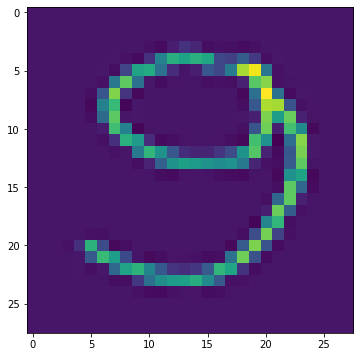

In [36]:
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *
import cv2

width = 200  # canvas width
height = 200 # canvas height
center = height//2
white = (255, 255, 255) # canvas back

def save():
    # save image to hard drive
    filename = "user_input.jpg"
    global output_image 
    output_image.save(filename)
    ###### Centering begin
    # Load image as grayscale and obtain bounding box coordinates
    image = cv2.imread('user_input.jpg', 0)
#     print(image)
    height, width = image.shape
    x,y,w,h = cv2.boundingRect(image)

    # Create new blank image and shift ROI to new coordinates
    ROI = image[y:y+h, x:x+w]
    mask = np.zeros([ROI.shape[0]+10,ROI.shape[1]+10])
    width, height = mask.shape
#     print(ROI.shape)
#     print(mask.shape)
    x = width//2 - ROI.shape[0]//2 
    y = height//2 - ROI.shape[1]//2 
#     print(x,y)
    mask[y:y+h, x:x+w] = ROI
#     print(mask)
    # Check if centering/masking was successful
#     plt.imshow(mask, cmap='viridis') 
    output_image = PIL.Image.fromarray(mask) # mask has values in [0-255] as expected
# Now we need to resize, but it causes problems with default arguments as it changes the range of pixel values to be negative or positive
    # compressed_output_image = output_image.resize((22,22))
    # Therefore, we use the following:
    compressed_output_image = output_image.resize((22,22), PIL.Image.BILINEAR) # PIL.Image.NEAREST or PIL.Image.BILINEAR also performs good

#     # Enhance Saturation
#     converter = PIL.ImageEnhance.Color(compressed_output_image)
#     compressed_output_image = converter.enhance(2.5)
    # Enhance contrast
#     converter = PIL.ImageEnhance.Contrast(compressed_output_image)
#     compressed_output_image = converter.enhance(3.5)
    # normalize in the range 0-1
    tensor_image = np.array(compressed_output_image.getdata())/255.
    tensor_image = tensor_image.reshape(22,22)
    # Padding
    tensor_image = np.pad(tensor_image, (3,3), "constant", constant_values=(0,0))
    # Normalization should be done after padding i guess
    tensor_image = (tensor_image - np.mean(trainData)) / np.std(trainData)
    plt.imshow(tensor_image.reshape(28,28), cmap='viridis')
    # Debugging
#     print(tensor_image)
#     print(np.array(compressed_output_image.getdata())) # Get data values)
#     print(np.array(image.getdata()))

    ### Compute the predictions
    output0 = model.predict(tensor_image.reshape(1,784))
    print(output0)
    output = np.argmax(output0)
    print(output)
    

def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
#     canvas.create_oval(x1, y1, x2, y2, fill="white",width=24)
    canvas.create_rectangle(x1, y1, x2, y2, fill="white",width=12)
    draw.line([x1, y1, x2, y2],fill="white",width=4)

master = Tk()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("L", (width, height), 0)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)

# add a button to save the image
button=Button(text="save",command=save)
button.pack()

master.mainloop()